In [60]:
import pandas as pd
import umap
import os
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import plotly.express as px

In [2]:
path = r'C:\Users\user\Desktop\Paper_preparation\Analysis_data'
list = os.listdir(path)
list_path = [os.path.join(path, i) for i in list]

In [3]:
os.chdir(path)

In [4]:
list

['Final_N1M1.csv', 'Final_N2M2.csv', 'Total_new.csv', 'Total_old.csv']

In [5]:
import Reduction as rd

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
Total = pd.read_csv(list_path[2], index_col=0)
Total

,Row,Column,Field,Nucleus_Intensity Mean,Nucleus_Intensity StdDev,Nucleus_Intensity Sum,Nucleus_Intensity CV [%],Nucleus_morphology Area [µm²],Nucleus_morphology Roundness,Nucleus_morphology Perimeter [µm],...,RBC_STAR Radial Relative Deviation,RBC_Texture SER Spot 0 px,RBC_Texture SER Hole 0 px,RBC_Texture SER Edge 0 px,RBC_Texture SER Ridge 0 px,RBC_Texture SER Valley 0 px,RBC_Texture SER Saddle 0 px,RBC_Texture SER Bright 0 px,RBC_Texture SER Dark 0 px,labels
0,3,3,2,414.744,39.1876,166727.0,9.44863,3.51710,0.464969,14.29790,...,0.357438,0.008972,0.007196,0.027784,0.010687,0.008286,0.007616,0.017071,0.013444,A
1,3,3,104,460.716,39.1745,223908.0,8.50296,4.25201,0.695722,10.50670,...,0.363581,0.009067,0.007407,0.026395,0.010727,0.009122,0.008084,0.017209,0.014353,A
2,3,3,107,965.280,260.0530,486501.0,26.94070,4.40949,0.955558,7.79008,...,0.372391,0.009016,0.006781,0.026033,0.010582,0.008869,0.008212,0.017023,0.013653,A
3,3,3,111,824.357,206.7790,126951.0,25.08370,1.34735,0.987315,4.16763,...,0.327762,0.007941,0.006832,0.039078,0.010550,0.008296,0.008129,0.016059,0.013157,A
4,3,3,112,2242.130,726.0620,475331.0,32.38270,1.85479,0.969959,4.97735,...,0.354997,0.008016,0.006201,0.039663,0.011312,0.008718,0.008316,0.016852,0.012971,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326507,4,20,22,935.433,519.3100,1291830.0,55.51550,12.08240,0.783747,15.72190,...,0.373437,0.008545,0.006328,0.031105,0.011250,0.008272,0.008318,0.017227,0.012721,H
326508,11,14,114,1647.950,882.1420,1766600.0,53.52980,9.37892,0.883344,12.29000,...,0.379638,0.008438,0.006758,0.031604,0.010324,0.008095,0.007796,0.016299,0.012906,H
326509,4,17,49,1242.090,999.7570,2161240.0,80.48970,15.22330,0.826623,16.73210,...,0.379575,0.008457,0.006535,0.033669,0.010393,0.008357,0.007798,0.016411,0.012958,H
326510,10,13,93,2807.320,1846.6800,4474870.0,65.78070,13.94590,0.941792,14.05640,...,0.390591,0.007766,0.005784,0.044584,0.010021,0.008488,0.008805,0.015456,0.012417,H


In [21]:
df = Total.groupby(['labels','Column','Field']).median()

In [22]:
df = df.reset_index(level=0)
df

labels   Row  Nucleus_Intensity Mean  Nucleus_Intensity StdDev  \
Column Field                                                                  
3      1          A  11.5               1281.4850                  395.1330   
       2          A  10.0                855.6315                  186.6385   
       3          A  10.0               1349.7600                  466.0150   
       4          A   8.0                817.0720                  212.7630   
       5          A   7.0               1243.4550                  377.3155   
...             ...   ...                     ...                       ...   
21     139        H   9.0               1637.1900                  885.1090   
       140        H   9.0               1150.8050                  826.4540   
       141        H   8.0               1526.9600                  897.8160   
       142        H   7.0                963.2985                  621.8750   
       143        H   9.0               1461.7800                  840.3300   

              Nucleus_Intensity Sum  Nucleus_Intensity CV [%]  \
Column Field                                                    
3      1                   434843.5                  29.51200   
       2                   275297.5                  21.83210   
       3                   300464.0                  29.06530   
       4                   228689.0                  24.69420   
       5                   272265.5                  28.16975   
...                             ...                       ...   
21     139                2903500.0                  51.23310   
       140                1985715.0                  55.27410   
       141                2373730.0                  53.01460   
       142                1631590.0                  58.41520   
       143                2227170.0                  47.51220   

              Nucleus_morphology Area [µm²]  Nucleus_morphology Roundness  \
Column Field                                                                
3      1                           3.202130                      0.954362   
       2                           3.705200                      0.796588   
       3                           2.213500                      0.874359   
       4                           2.309730                      0.936629   
       5                           1.911655                      0.956609   
...                                     ...                           ...   
21     139                        16.544400                      0.881620   
       140                        15.205750                      0.878385   
       141                        16.080700                      0.864480   
       142                        15.770050                      0.773491   
       143                        14.208400                      0.879562   

              Nucleus_morphology Perimeter [µm]  \
Column Field                                      
3      1                               6.587545   
       2                               9.268000   
       3                               5.701030   
       4                               5.705060   
       5                               5.112065   
...                                         ...   
21     139                            17.097700   
       140                            16.123250   
       141                            16.358200   
       142                            18.056350   
       143                            16.730200   

              Nucleus_morphology Width [µm]  ...  RBC_STAR Radial Mean   \
Column Field                                 ...                          
3      1                            1.57260  ...               28.11615   
       2                            1.42206  ...               27.51195   
       3                            1.33981  ...               27.32050   
       4                            1.44582  ...               27.97430   
       5               

In [24]:
Total_data = df.iloc[:,2:]
Total_data

Nucleus_Intensity Mean  Nucleus_Intensity StdDev  \
Column Field                                                     
3      1                   1281.4850                  395.1330   
       2                    855.6315                  186.6385   
       3                   1349.7600                  466.0150   
       4                    817.0720                  212.7630   
       5                   1243.4550                  377.3155   
...                              ...                       ...   
21     139                 1637.1900                  885.1090   
       140                 1150.8050                  826.4540   
       141                 1526.9600                  897.8160   
       142                  963.2985                  621.8750   
       143                 1461.7800                  840.3300   

              Nucleus_Intensity Sum  Nucleus_Intensity CV [%]  \
Column Field                                                    
3      1                   434843.5                  29.51200   
       2                   275297.5                  21.83210   
       3                   300464.0                  29.06530   
       4                   228689.0                  24.69420   
       5                   272265.5                  28.16975   
...                             ...                       ...   
21     139                2903500.0                  51.23310   
       140                1985715.0                  55.27410   
       141                2373730.0                  53.01460   
       142                1631590.0                  58.41520   
       143                2227170.0                  47.51220   

              Nucleus_morphology Area [µm²]  Nucleus_morphology Roundness  \
Column Field                                                                
3      1                           3.202130                      0.954362   
       2                           3.705200                      0.796588   
       3                           2.213500                      0.874359   
       4                           2.309730                      0.936629   
       5                           1.911655                      0.956609   
...                                     ...                           ...   
21     139                        16.544400                      0.881620   
       140                        15.205750                      0.878385   
       141                        16.080700                      0.864480   
       142                        15.770050                      0.773491   
       143                        14.208400                      0.879562   

              Nucleus_morphology Perimeter [µm]  \
Column Field                                      
3      1                               6.587545   
       2                               9.268000   
       3                               5.701030   
       4                               5.705060   
       5                               5.112065   
...                                         ...   
21     139                            17.097700   
       140                            16.123250   
       141                            16.358200   
       142                            18.056350   
       143                            16.730200   

              Nucleus_morphology Width [µm]  Nucleus_morphology Length [µm]  \
Column Field                                                                  
3      1                            1.57260                        2.085390   
       2                            1.42206                        2.227875   
       3                            1.33981                        1.878440   
       4                            1.44582                        1.924920   
       5                            1.24425                        1.817910   
...                                     ...                             ...   
21     139 

In [51]:
Total_target = df.iloc[:,[0]]

In [52]:
Total_target = Total_target.reset_index(level=0).reset_index(level=0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(Total_data)

In [33]:
standard_embedding = umap.UMAP(random_state=0).fit_transform(X_scaled)

In [144]:
A = pd.DataFrame(standard_embedding)

In [145]:
B = Total_target.labels
B

0       A
1       A
2       A
3       A
4       A
       ..
9268    H
9269    H
9270    H
9271    H
9272    H
Name: labels, Length: 9273, dtype: object

In [146]:
C = pd.concat([A, B], axis=1)
C.columns = ['umap1','umap2','labels']
C

,umap1,umap2,labels
0,-6.414564,15.240885,A
1,-5.907635,12.785896,A
2,-3.985015,12.575334,A
3,-4.190113,11.459157,A
4,-6.053256,12.323028,A
...,...,...,...
9268,9.109509,12.820453,H
9269,7.961643,14.019389,H
9270,9.210253,13.533677,H
9271,7.286907,13.893444,H


In [115]:
px.scatter(C, x=C.umap1,y=C.umap2, color = 'labels')

In [109]:
kmeans_labels = cluster.KMeans(n_clusters=7).fit_predict(X_scaled)

c:\Venv\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [110]:
AAA = pd.DataFrame(kmeans_labels, columns=['kmean_labels'])
AAA

,kmean_labels
0,5
1,2
2,2
3,2
4,2
...,...
9268,1
9269,1
9270,1
9271,1


In [111]:
C

,umap1,umap2,labels
0,-6.414564,15.240885,A
1,-5.907635,12.785896,A
2,-3.985015,12.575334,A
3,-4.190113,11.459157,A
4,-6.053256,12.323028,A
...,...,...,...
9268,9.109509,12.820453,H
9269,7.961643,14.019389,H
9270,9.210253,13.533677,H
9271,7.286907,13.893444,H


In [112]:
D = pd.concat([C,AAA], axis=1)
D

,umap1,umap2,labels,kmean_labels
0,-6.414564,15.240885,A,5
1,-5.907635,12.785896,A,2
2,-3.985015,12.575334,A,2
3,-4.190113,11.459157,A,2
4,-6.053256,12.323028,A,2
...,...,...,...,...
9268,9.109509,12.820453,H,1
9269,7.961643,14.019389,H,1
9270,9.210253,13.533677,H,1
9271,7.286907,13.893444,H,1


In [117]:
D['kmean_labels'] = D['kmean_labels'].astype('category')

In [118]:
px.scatter(D, x=D.umap1,y=D.umap2, color = 'kmean_labels')

In [122]:
(
    adjusted_rand_score(D.labels, D.kmean_labels),
    adjusted_mutual_info_score(D.labels, D.kmean_labels)
)

(0.43638212703833196, 0.6186632252631459)

In [223]:
lowd = PCA(n_components=80).fit_transform(X_sclaed)
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, 
                                 min_cluster_size=100).fit_predict(lowd)

In [227]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X_scaled)

In [228]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

In [233]:
labels

array([3, 3, 2, ..., 1, 1, 1], dtype=int64)

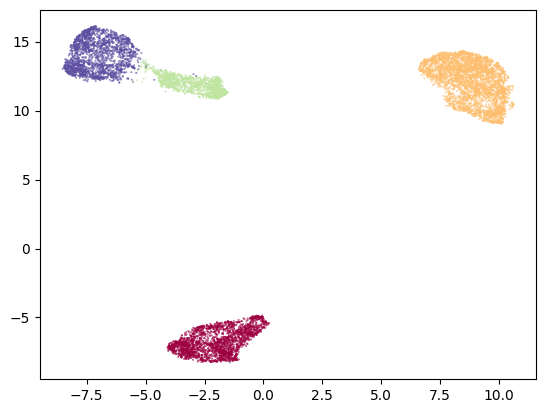

In [229]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [232]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(C.labels[clustered], C.hdbscan_labels[clustered]),
    adjusted_mutual_info_score(C.labels[clustered], C.hdbscan_labels[clustered])
)

(0.4452013864657127, 0.6897767702557169)

In [224]:
C_PCA50 = C.copy()
C_PCA50['hdbscan_labels'] = hdbscan_labels

In [225]:
hdbscan_labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [226]:
clustered = (hdbscan_labels >= 0)

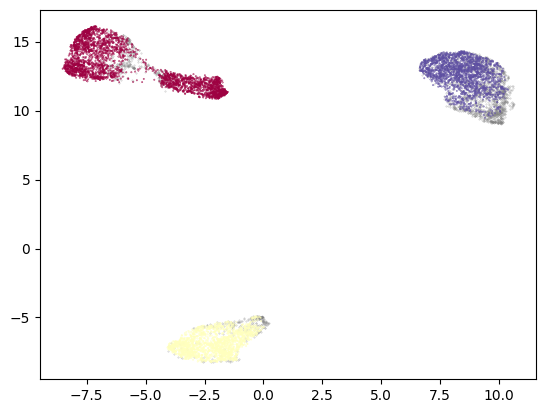

In [218]:
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=0.1,
            cmap='Spectral');

In [219]:
(
    adjusted_rand_score(C.labels, C.hdbscan_labels),
    adjusted_mutual_info_score(C.labels, C.hdbscan_labels)
)

(0.35994296749642357, 0.5382403970671455)

In [220]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(C.labels[clustered], C.hdbscan_labels[clustered]),
    adjusted_mutual_info_score(C.labels[clustered], C.hdbscan_labels[clustered])
)

(0.4452013864657127, 0.6897767702557169)

In [192]:
labels = cluster.fit_predict(C[['umap1','umap2']])
C['hdbscan_labels'] = hdbscan_labels

In [170]:
C.hdbscan_labels.astype('category')

0      -1
1      -1
2       0
3       0
4       0
       ..
9268    2
9269    2
9270    2
9271    2
9272    2
Name: hdbscan_labels, Length: 9273, dtype: category
Categories (4, int64): [-1, 0, 1, 2]

In [164]:
C

,umap1,umap2,labels,hdbscan_labels
0,-6.414564,15.240885,A,2
1,-5.907635,12.785896,A,2
2,-3.985015,12.575334,A,2
3,-4.190113,11.459157,A,2
4,-6.053256,12.323028,A,2
...,...,...,...,...
9268,9.109509,12.820453,H,1
9269,7.961643,14.019389,H,1
9270,9.210253,13.533677,H,1
9271,7.286907,13.893444,H,1


In [162]:
# Plotly를 사용하여 결과 시각화
fig = px.scatter(C, x='umap1', y='umap2', color='hdbscan_labels', 
                 facet_col='labels')
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [165]:
(
    adjusted_rand_score(C.labels, C.hdbscan_labels),
    adjusted_mutual_info_score(C.labels, C.hdbscan_labels)
)

(0.42919333832258605, 0.6827960181461408)